Our problem to solve was a modified version of the Travel Salesman Problem: additionally, we have cost associated with each node, and we had to select exactly 50% of the total nodes.

# Code

In [1]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
tsp_a = pd.read_csv("../Lab1/TSPA.csv", sep=';',header=None)
tsp_b = pd.read_csv("../Lab1/TSPB.csv", sep=';',header=None)

tsp_a

,0,1,2
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
...,...,...,...
195,1023,1258,197
196,3192,1271,1183
197,3735,1879,1461
198,3983,299,1309


In [3]:
def generate_dm(df, show=True):
    temp = df[[0, 1]].to_numpy()
    dm = distance_matrix(temp, temp)


    temp = df[2].to_numpy() // 2
    temp = temp * np.ones((200, 200))
    dm = dm+temp+temp.T
    dm = dm // 1

    for i in range(200):
        dm[i][i] = np.inf

    
    if show: 
        df_dist = pd.DataFrame(dm)
        display(df_dist)
    return dm


### Regret

In [4]:
test_data = tsp_a[:50]
test_data

,0,1,2
0,1510,353,84
1,3042,123,483
2,2145,389,1462
3,1030,365,1986
4,2125,360,145
5,3121,1452,1117
6,2572,1989,151
7,755,1780,1072
8,3805,1161,273
9,2736,795,1589


In [5]:
def generate_dm(df, show=True):
    temp = df[[0, 1]].to_numpy()
    dm = distance_matrix(temp, temp)


    temp = df[2].to_numpy() // 2
    temp = temp * np.ones((50, 50))
    dm = dm+temp+temp.T
    dm = dm // 1

    for i in range(50):
        dm[i][i] = np.inf


    if show:
        df_dist = pd.DataFrame(dm)
        display(df_dist)
    return dm


In [6]:
test_dm = generate_dm(test_data)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,inf,1832.0,1409.0,1515.0,729.0,2550.0,2067.0,2192.0,2611.0,2139.0,...,1130.0,1861.0,3119.0,790.0,2315.0,1735.0,2186.0,1989.0,2373.0,907.0
1,1832.0,inf,1907.0,3260.0,1260.0,2130.0,2240.0,3601.0,1665.0,1773.0,...,2879.0,722.0,2677.0,1552.0,3163.0,2038.0,3933.0,3453.0,1075.0,2529.0
2,1409.0,1907.0,inf,2839.0,838.0,2732.0,2461.0,3233.0,2697.0,2242.0,...,2448.0,1961.0,3331.0,1279.0,3004.0,2090.0,3507.0,3057.0,2427.0,2085.0
3,1515.0,3260.0,2839.0,inf,2160.0,3907.0,3307.0,2970.0,4015.0,3546.0,...,1651.0,3284.0,4448.0,2199.0,3401.0,3041.0,2659.0,2789.0,3804.0,2173.0
4,729.0,1260.0,838.0,2160.0,inf,2107.0,1836.0,2581.0,2069.0,1616.0,...,1771.0,1308.0,2708.0,585.0,2368.0,1463.0,2829.0,2402.0,1788.0,1413.0
5,2550.0,2130.0,2732.0,3907.0,2107.0,inf,1400.0,3482.0,1437.0,2113.0,...,3483.0,2350.0,1721.0,2546.0,2765.0,1804.0,4475.0,3489.0,1902.0,3116.0
6,2067.0,2240.0,2461.0,3307.0,1836.0,1400.0,inf,2439.0,1696.0,2074.0,...,2860.0,2431.0,1500.0,2264.0,1698.0,1273.0,3737.0,2558.0,2170.0,2577.0
7,2192.0,3601.0,3233.0,2970.0,2581.0,3482.0,2439.0,inf,3784.0,3542.0,...,2490.0,3697.0,3785.0,2820.0,2308.0,2653.0,2841.0,1710.0,3941.0,2676.0
8,2611.0,1665.0,2697.0,4015.0,2069.0,1437.0,1696.0,3784.0,inf,2059.0,...,3605.0,1906.0,1551.0,2477.0,3081.0,2051.0,4639.0,3761.0,1010.0,3219.0
9,2139.0,1773.0,2242.0,3546.0,1616.0,2113.0,2074.0,3542.0,2059.0,inf,...,3139.0,1949.0,2718.0,2044.0,3005.0,1864.0,4182.0,3440.0,1988.0,2751.0


In [7]:
def get_nodes(edge:str):
    return [int(i) for i in edge.split('_')]

In [9]:
start_node_idx = 0
data = test_data
dm = test_dm
data_indexes = data.index.to_list()
cost = 0

if start_node_idx is None:
    start_node_idx = random.choice(data_indexes)

node = data_indexes[start_node_idx]
next_node = dm[node].argmin()

data_indexes.remove(node)
data_indexes.remove(next_node)

edge1 = str(node) + '_' + str(next_node)
edge2 = str(next_node) + '_' + str(node)
cycle = [(edge1, dm[node].min()), (edge2, dm[node].min())]
# print(node)
# print(cycle,)
while len(cycle) < data.shape[0]//2:
    min_dist_v = np.inf
    new_edge1_v = None
    new_edge2_v = None
    bad_edge_v = None
    new_node_v = None
    max_dist_u = -np.inf
    new_edge1_u = None
    new_edge2_u = None
    bad_edge_u = None
    new_node_u = None
    for edge, dist in cycle:
            old_node1_v, old_node2_v = [int(i) for i in edge.split('_')]
            for node in data_indexes:
                edge1 = str(old_node1_v) + '_' + str(node)
                edge2 = str(node) + '_' + str(old_node2_v)
                change = dm[old_node1_v][node] + dm[old_node2_v][node] - dist
                if change < min_dist_v:
                    min_dist_v = change
                    new_edge1_v = (edge1, dm[old_node1_v][node])
                    new_edge2_v = (edge2, dm[old_node2_v][node])
                    bad_edge_v = (edge, dist)
                    new_node_v = node

    bad_edge1, bad_edge2 = bad_edge_v[0].split('_')

    for edge, dist in cycle:
        if bad_edge1 not in edge and bad_edge2 not in edge:
            old_node1, old_node2 = edge.split('_')
            edges_to_delete = [e for e in cycle if int(old_node1) in get_nodes(e[0])]
            score_u = sum([i for j,i in edges_to_delete])
            if max_dist_u < score_u:
                    max_dist_u = score_u
                    # edges = [j for j,i in edges_to_delete]
                    new_edge1_u = edges_to_delete[0]
                    new_edge2_u = edges_to_delete[1]
                    new_edge_nodes = [j for j,i in edges_to_delete]
                    bad1 = get_nodes(new_edge_nodes[0])[0]
                    bad2 = get_nodes(new_edge_nodes[1])[1]
                    bad_edge_u = (str(bad1)+'_'+str(bad2),dm[bad1][bad2])
                    # new_edge2_u =
                    new_node_u = old_node1
    z = 1
    if min_dist_v >= max_dist_u:
        cycle.remove(bad_edge_v)
        cycle.append(new_edge1_v)
        cycle.append(new_edge2_v)
        data_indexes.remove(new_node_v)
    else:
        if len(cycle) <= 3:
            cycle.remove(new_edge1_u)
            cycle.remove(new_edge2_u)
            cycle.append(new_edge1_v)
            cycle.append(new_edge2_v)
            data_indexes.remove(new_node_v)
            data_indexes.append(new_node_u)
        else:

            cycle.remove(new_edge1_u)
            cycle.remove(new_edge2_u)
            cycle.remove(bad_edge_v)
            cycle.append(new_edge1_v)
            cycle.append(new_edge2_v)
            cycle.append(bad_edge_u)
            data_indexes.remove(new_node_v)
            data_indexes.append(int(new_node_u))





KeyboardInterrupt



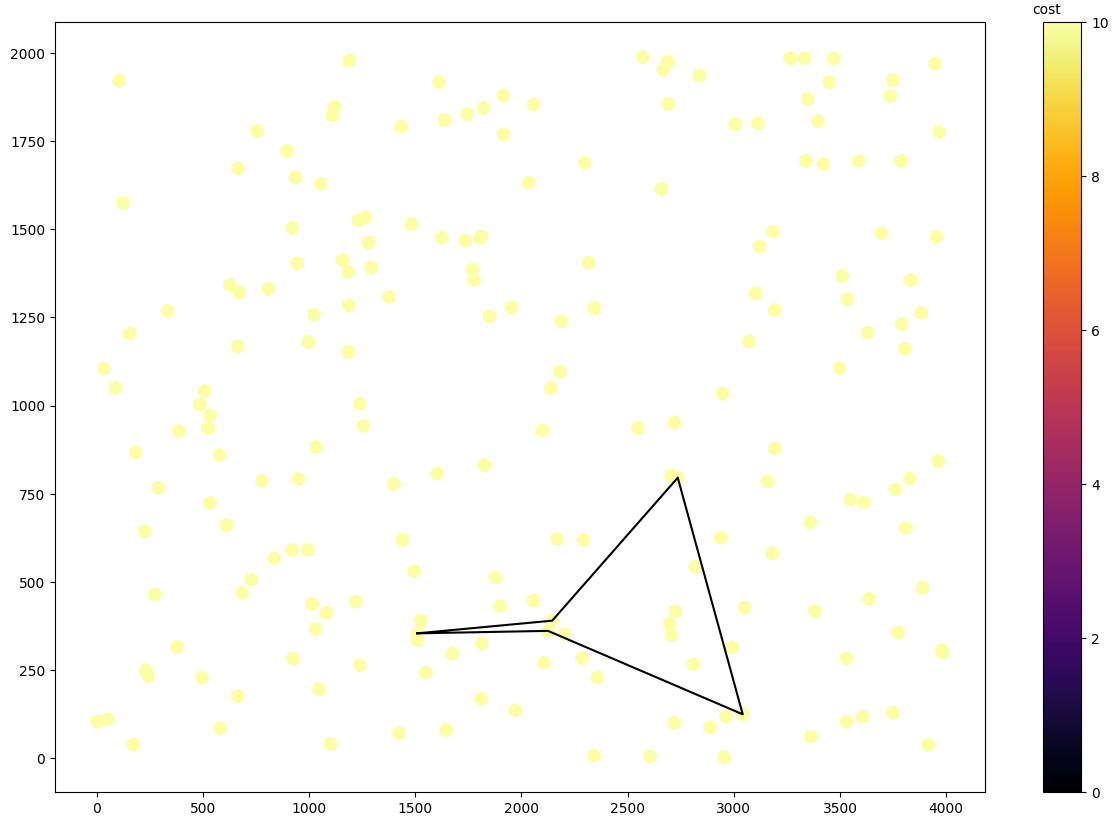

In [40]:
cycle = [x[0].split('_') for x in cycle ]
order = ['0']
while len(order) < 5:
    for n1, n2 in cycle:
        if n1 == order[-1]:
            order.append(n2)

order = [int(x) for x in order]
cycle = tsp_a.loc[order]
cycle = cycle.append(cycle.iloc[0])


plt.figure(figsize=(15, 10))
plt.scatter(tsp_a[0], tsp_a[1], 80, tsp_a[2], cmap='inferno')
plt.clim(0, 10)
plt.colorbar().set_label('cost', labelpad=-45, y=1.025, rotation=0)
plt.plot(cycle[0], cycle[1], c='black')
plt.show()

In [31]:
cycle.append(('0_5',200))

In [36]:
cycle



[('4_0', 729.0),
 ('0_2', 1409.0),
 ('1_4', 1260.0),
 ('2_9', 2242.0),
 ('9_1', 1773.0)]

In [30]:
for edge, dist in cycle:
    old_node1, old_node2 = edge.split('_')
    print(old_node1)
    edges_to_delete = [i for e,i in cycle if old_node1 in e]
    print(edges_to_delete)

0
[729.0, 729.0, 200]
4
[729.0, 729.0]
0
[729.0, 729.0, 200]


In [9]:
def get_total_greedy_cycle_cost(data: pd.DataFrame, dm: np.array, start_node_idx: int = None,) -> int:
    data_indexes = data.index.to_list()
    cost = 0

    if start_node_idx is None:
        start_node_idx = random.choice(data_indexes)

    node = data_indexes[start_node_idx]
    next_node = dm[node].argmin()

    data_indexes.remove(node)
    data_indexes.remove(next_node)

    edge1 = str(node) + '_' + str(next_node)
    edge2 = str(next_node) + '_' + str(node)
    cycle = [(edge1, dm[node].min()), (edge2, dm[node].min())]

    while len(cycle) < 10:

        min_dist = 100000
        new_edge1 = None
        new_edge2 = None
        bad_edge = None
        new_node = None

        for edge, dist in cycle:
            old_node1, old_node2 = [int(i) for i in edge.split('_')]
            for node in data_indexes:
                edge1 = str(old_node1) + '_' + str(node)
                edge2 = str(node) + '_' + str(old_node2)
                change = dm[old_node1][node] + dm[old_node2][node] - dist

                if change < min_dist:
                    min_dist = change
                    new_edge1 = (edge1, dm[old_node1][node])
                    new_edge2 = (edge2, dm[old_node2][node])
                    bad_edge = (edge, dist)
                    new_node = node

        cycle.remove(bad_edge)
        cycle.append(new_edge1)
        cycle.append(new_edge2)
        data_indexes.remove(new_node)

    cost = sum([x[1] for x in cycle])

    return cost, cycle
# dm = generate_dm(tsp_a, False)
cost, cycle = get_total_greedy_cycle_cost(test_data, test_dm, 0)
cost

KeyboardInterrupt: 